In [2]:
import numpy as np
import pandas as pd 
import sklearn 
import torch 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import torch.nn as nn
import math
import gc 

# Function 1 

In [ ]:
torch.manual_seed(1)

In [ ]:
# defining our first function 
#x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)

y = (np.sin(5*np.pi*x))/(5*np.pi*x) 
print(x.shape)
print(y.shape)
# 
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [ ]:

# plotting the  graph of 1st function 

#x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)



x, y = torch.tensor(x).clone().detach().float(), torch.tensor(y).clone().detach().float()

plt.figure(figsize=(10,5))
plt.plot(x, y, color = "blue")
plt.title('Function 1  Plot')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

In [ ]:
def training_fun(model, x, y):
    max_epoch= 20000
    epoch_arr = []
    loss_arr = []
    not_converged = True 
    current_epoch = 0
    
    while not_converged:
        current_epoch += 1
        prediction = model(x) # predictions on input x 
        loss = loss_func(prediction, y)
        optimizer.zero_grad() 
        loss.backward() #back propogation
        optimizer.step() 
        epoch_arr.append(current_epoch)
        loss_arr.append(loss.detach().numpy())
        
        if current_epoch % 500 == 0: 
            print(f'epoch: {current_epoch}, loss = {loss.item():.4f}')
                
        if current_epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False

        elif (current_epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss",loss_arr[-1])
                not_converged = False
                
    return epoch_arr, loss_arr,prediction 

In [ ]:
def paramerter_count(m,i):
  a=[]
  for i in m.parameters():
    a.append(torch.numel(i))
  print('Total no of parameters in Model :'+str(i), np.sum(a),)
def model_weight(m,flag,i):
   if flag:
    print("\nModel "+str(i)+" weight and bias before training\n")
   else:print("\nModel "+str(i)+" weight and bias after training\n")
   data = [] 
   for param_name, param_tensor in m.state_dict().items():  # Iterate over items to get both name and tensor
        data.append({'Model': i, 'Parameter Name': param_name, 'Value': param_tensor.numpy()})
   return pd.DataFrame(data) 
      #print(param, "\t",m.state_dict()[param])

# Model 1 

In [ ]:
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
        self.h_layer1  = nn.Linear(1,5)
        self.h_layer2  = nn.Linear(5,10)
        self.h_layer3  = nn.Linear(10,10)
        self.h_layer4  = nn.Linear(10,10)
        self.h_layer5  = nn.Linear(10,10)
        self.h_layer6  = nn.Linear(10,10)
        self.h_layer7  = nn.Linear(10,10)
        self.h_layer8  = nn.Linear(10,5)
        self.predict = nn.Linear(5,1)
        
    def forward(self, x):
        x = nn.functional.leaky_relu(self.h_layer1(x))
        x = nn.functional.leaky_relu(self.h_layer2(x))
        x = nn.functional.leaky_relu(self.h_layer3(x))
        x = nn.functional.leaky_relu(self.h_layer4(x))
        x = nn.functional.leaky_relu(self.h_layer5(x))
        x = nn.functional.leaky_relu(self.h_layer6(x))
        x = nn.functional.leaky_relu(self.h_layer7(x))
        x = nn.functional.leaky_relu(self.h_layer8(x))
        x = self.predict(x)
        return x
    
model_1 = Model_1()

In [ ]:
optimizer = torch.optim.RMSprop(model_1.parameters(), lr = 0.0012, 
                                weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss

In [ ]:
paramerter_count(model_1,1)
print(model_weight(model_1,1,1))
m1_epoch_arr, m1_loss_arr, m1_prediction =training_fun(model_1, x, y)
print(model_weight(model_1,0,1))

In [ ]:
# plotting graphs for out model_1
plt.plot(m1_epoch_arr, m1_loss_arr,color="red")
plt.title('Model_1 Loss')
plt.show()

plt.plot(x.numpy(),y.numpy(),color="yellow")
plt.plot(x,m1_prediction.data.numpy(),color="green")
plt.title('Model_1 Prediction')
plt.show()

# Model 2

In [ ]:
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
        self.h_layer1  = nn.Linear(1,10)
        self.h_layer2  = nn.Linear(10,18)
        self.h_layer3  = nn.Linear(18,14)
        self.h_layer4  = nn.Linear(14,5)
        self.predict = nn.Linear(5,1)
        
    def forward(self, x):
        x = nn.functional.leaky_relu(self.h_layer1(x))
        x = nn.functional.leaky_relu(self.h_layer2(x))
        x = nn.functional.leaky_relu(self.h_layer3(x))
        x = nn.functional.leaky_relu(self.h_layer4(x))
        x = self.predict(x)
        return x
    
model_2 = Model_2()

In [ ]:
optimizer = torch.optim.RMSprop(model_2.parameters(), lr = 0.0012, 
                                weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss

In [ ]:
paramerter_count(model_2,3)
print(model_weight(model_2,1,3))
m2_epoch_arr, m2_loss_arr, m2_prediction =training_fun(model_2, x, y)
print(model_weight(model_2,0,3))

In [ ]:
# plotting graphs for out model_1
plt.plot(m2_epoch_arr, m2_loss_arr,color="red")
plt.title('Model_2 Loss')
plt.show()

plt.plot(x.numpy(),y.numpy(),color="yellow")
plt.plot(x,m2_prediction.data.numpy(),color="green")
plt.title('Model_2 Prediction')
plt.show()

# Model 3

In [ ]:
class Model_3(nn.Module):
    def __init__(self):
        super(Model_3, self).__init__()
        self.h_layer1  = nn.Linear(1,100)
        self.h_layer2  = nn.Linear(100,200)
        self.predict = nn.Linear(200,1)
        
    def forward(self, x):
        x = nn.functional.leaky_relu(self.h_layer1(x))
        x = nn.functional.leaky_relu(self.h_layer2(x))        
        x = self.predict(x)
        return x
    
model_3 = Model_3()

In [ ]:
optimizer = torch.optim.RMSprop(model_3.parameters(), lr = 0.0011, 
                                weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss

In [ ]:
paramerter_count(model_3,1)
print(model_weight(model_3,1,3))
m3_epoch_arr, m3_loss_arr, m3_prediction =training_fun(model_3, x, y)
print(model_weight(model_3,0,3))

In [ ]:
# plotting graphs for out model_3
plt.plot(m3_epoch_arr, m3_loss_arr,color="red")
plt.title('Model_3 Loss')
plt.show()

plt.plot(x.numpy(),y.numpy(),color="yellow")
plt.plot(x,m3_prediction.data.numpy(),color="green")
plt.title('Model_3 Prediction')
plt.show()

In [ ]:
# plotting comparitive graphs of all models used 

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(m1_epoch_arr,m1_loss_arr, color = "black",alpha = 0.5)
plt.plot(m2_epoch_arr,m2_loss_arr, color = "blue",alpha = 0.5)
plt.plot(m3_epoch_arr,m3_loss_arr, color = "yellow",alpha = 0.5)
plt.title('Model Loss')
plt.legend(['Model_1', 'Model_2','Model_3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('AJ_Fun1_EpochVSLoss1.pdf')
plt.show()

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(x,m1_prediction.data.numpy(),color="magenta")
plt.plot(x,m2_prediction.data.numpy(),color="blue")
plt.plot(x,m3_prediction.data.numpy(),color="yellow")
plt.plot(x,y.numpy(),color="black")
plt.title('Model Prediction')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('AJ_Model_Prediction1.pdf')
plt.show()

# Function 2

In [ ]:
# simulating our second function 

In [ ]:
torch.manual_seed(1)
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y = np.sign(np.sin(5 * np.pi * x))
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

print(x.shape)
print(y.shape)


In [ ]:
# plotting the graph of original function
plt.figure(figsize=(10,4))
plt.plot(x, y, color='yellow')
plt.title('Function 2')
plt.xlabel('Input')
plt.ylabel('Output')
plt.savefig('AJ_2ndfuncplt.pdf')
plt.show()

n_samples, n_features = x.shape

# Training our models on second function

# Model 1

In [ ]:
sgn_model_1 = Model_1()
optimizer = torch.optim.RMSprop(sgn_model_1.parameters(), lr = 0.0012, 
                                weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss

In [ ]:
paramerter_count(sgn_model_1,1)
print(model_weight(sgn_model_1,1,1))
m1_epoch_arr, m1_loss_arr, m1_prediction =training_fun(sgn_model_1, x, y)
print(model_weight(sgn_model_1,0,1))

In [ ]:
# plotting graphs for out model_1
plt.plot(m1_epoch_arr, m1_loss_arr,color="red")
plt.title('sgn_Model_1 Loss')
plt.show()

plt.plot(x.numpy(),y.numpy(),color="black", alpha = 0.6)
plt.plot(x,m1_prediction.data.numpy(),color="yellow")
plt.title('sgn_Model_1 Prediction')
plt.show()

# Model 2

In [ ]:
sgn_model_2 = Model_2()
optimizer = torch.optim.RMSprop(sgn_model_2.parameters(), lr = 0.0012, 
                                weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss

paramerter_count(sgn_model_2,3)
print(model_weight(sgn_model_2,1,3))
m2_epoch_arr, m2_loss_arr, m2_prediction =training_fun(sgn_model_2, x, y)
print(model_weight(sgn_model_2,0,3))

In [ ]:
# plotting graphs for out model_2
plt.plot(m2_epoch_arr, m2_loss_arr,color="red")
plt.title('sgn_Model_2 Loss')
plt.show()

plt.plot(x.numpy(),y.numpy(),color="black", alpha = 0.6)
plt.plot(x,m2_prediction.data.numpy(),color="red")
plt.title('sgn_Model_2 Prediction')
plt.show()

# Model 3

In [ ]:
sgn_model_3 = Model_3()
optimizer = torch.optim.RMSprop(sgn_model_3.parameters(), lr = 0.0011, 
                                weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss

paramerter_count(sgn_model_3,1)
print(model_weight(sgn_model_3,1,3))
m3_epoch_arr, m3_loss_arr, m3_prediction =training_fun(sgn_model_3, x, y)
print(model_weight(sgn_model_3,0,3))

In [ ]:
# plotting graphs for out model_3
plt.plot(m3_epoch_arr, m3_loss_arr,color="red")
plt.title('sgn_Model_3 Loss')
plt.show()

plt.plot(x.numpy(),y.numpy(),color="black", alpha =0.8)
plt.plot(x,m3_prediction.data.numpy(),color="green")
plt.title('sgn_Model_3 Prediction')
plt.show()

In [ ]:
# Plotting comparitive graphs 

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(m1_epoch_arr,m1_loss_arr, color = "red",alpha = 0.5)
plt.plot(m2_epoch_arr,m2_loss_arr, color = "blue",alpha = 0.5)
plt.plot(m3_epoch_arr,m3_loss_arr, color = "yellow",alpha = 0.5)
plt.title('sgn Model Loss')
plt.legend(['Model_1', 'Model_2','Model_3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('AJ_Fun2_EpochVSLoss1.pdf')
plt.show()


plt.figure(figsize=(15,8))
plt.plot(x,m1_prediction.data.numpy(),color="red")
plt.plot(x,m2_prediction.data.numpy(),color="blue")
plt.plot(x,m3_prediction.data.numpy(),color="yellow")
plt.plot(x,y.numpy(),color="black")
plt.title('sgn Model Prediction')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('AJ_Model_Prediction2.pdf')
plt.show()

 # Function 3

In [ ]:
# sigmoid function

torch.manual_seed(1)

x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)

# Define the desired non-linear function for y
y = torch.sigmoid(5 * x)

print(x.shape)
print(y.shape)


In [ ]:
# plotting the graph of original function
plt.figure(figsize=(10,10))
plt.plot(x, y, color='yellow')
plt.title('Function 3')
plt.xlabel('Input')
plt.ylabel('Output')
plt.savefig('AJ_3rdfuncplt.pdf')
plt.show()

n_samples, n_features = x.shape

# Training our models on 3rd function 

# Model 1

In [ ]:
sgmd_model_1 = Model_1()
optimizer = torch.optim.RMSprop(sgmd_model_1.parameters(), lr = 0.0012, 
                                weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss

In [ ]:
paramerter_count(sgmd_model_1,1)
print(model_weight(sgmd_model_1,1,1))
m1_epoch_arr, m1_loss_arr, m1_prediction =training_fun(sgmd_model_1, x, y)
print(model_weight(sgmd_model_1,0,1))

In [ ]:
# plotting graphs for out model_1
plt.plot(m1_epoch_arr, m1_loss_arr,color="red")
plt.title('sgn_Model_1 Loss')
plt.show()

plt.plot(x.numpy(),y.numpy(),color="black", alpha = 0.6)
plt.plot(x,m1_prediction.data.numpy(),color="yellow")
plt.title('sgn_Model_1 Prediction')
plt.show()

 # Model 2

In [ ]:
sgmd_model_2 = Model_2()
optimizer = torch.optim.RMSprop(sgmd_model_2.parameters(), lr = 0.0012, 
                                weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss

paramerter_count(sgmd_model_2,3)
print(model_weight(sgmd_model_2,1,3))
m2_epoch_arr, m2_loss_arr, m2_prediction =training_fun(sgmd_model_2, x, y)
print(model_weight(sgmd_model_2,0,3))

In [ ]:
# plotting graphs for out model_2
plt.plot(m2_epoch_arr, m2_loss_arr,color="red")
plt.title('sgmd_Model_2 Loss')
plt.show()

plt.plot(x.numpy(),y.numpy(),color="black", alpha = 0.6)
plt.plot(x,m2_prediction.data.numpy(),color="yellow")
plt.title('sgmd_Model_2 Prediction')
plt.show()

# Model 3

In [ ]:
sgmd_model_3 = Model_3()
optimizer = torch.optim.RMSprop(sgmd_model_3.parameters(), lr = 0.0011, 
                                weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss

paramerter_count(sgmd_model_3,1)
print(model_weight(sgmd_model_3,1,3))
m3_epoch_arr, m3_loss_arr, m3_prediction =training_fun(sgmd_model_3, x, y)
print(model_weight(sgmd_model_3,0,3))

In [ ]:
# plotting graphs for out model_3
plt.plot(m3_epoch_arr, m3_loss_arr,color="red")
plt.title('sgmd_Model_3 Loss')
plt.show()

plt.plot(x.numpy(),y.numpy(),color="black", alpha =0.8)
plt.plot(x,m3_prediction.data.numpy(),color="green")
plt.title('sgmd_Model_3 Prediction')
plt.show()

In [ ]:
# Plotting comparitive graphs for 3rd function

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(m1_epoch_arr,m1_loss_arr, color = "red")
plt.plot(m2_epoch_arr,m2_loss_arr, color = "blue")
plt.plot(m3_epoch_arr,m3_loss_arr, color = "yellow")
plt.title('sgmd Model Loss')
plt.legend(['Model_1', 'Model_2','Model_3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('AJ_Fun3_EpochVSLoss1.pdf')
plt.show()


plt.figure(figsize=(15,8))
plt.plot(x,m1_prediction.data.numpy(),color="red")
plt.plot(x,m2_prediction.data.numpy(),color="blue")
plt.plot(x,m3_prediction.data.numpy(),color="yellow")
plt.plot(x,y.numpy(),color="black")
plt.title('sgmd Model Prediction')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('AJ_Model_Prediction3.pdf')
plt.show()

# 1.2

# Training on MNIST actual data 

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [4]:
torch.manual_seed(1)

In [5]:
# Load and prepare MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())


In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=600, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

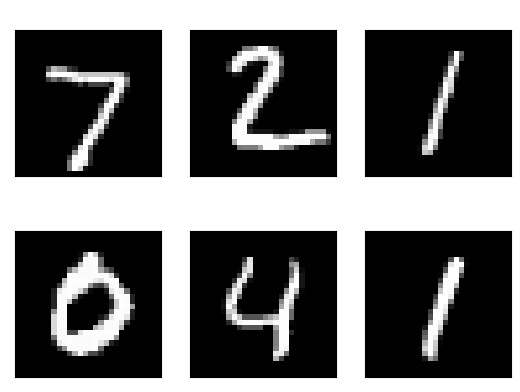

In [7]:
# plotting test data sample
test_iter = iter(test_loader)
example_data, example_targets = next(test_iter)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title("Actual Val: {}".format(example_targets[i]),color='white')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [8]:
def trainFunc(model,num_epochs):
    model.train()
    n_total_steps = len(train_loader)
    train_losses = []
    train_epoch = []
    train_acc = []
    not_converged =True
    epoch = 0
    trainAvgLossArr = []
    while not_converged:
        epoch += 1
        n_correct = 0
        n_samples = 0
        lossSum = 0

        for i, (images, labels) in enumerate(train_loader):  
            # Forward pass
            prediction = model(images)
            loss = loss_func(prediction, labels)
            lossSum += loss.detach().numpy()
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            acc = 100.0 * n_correct / n_samples

            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}',end='\r',flush=True)
                train_epoch.append(epoch)
                train_losses.append(loss.item())
                print(f'Epoch [{epoch}/{num_epochs}], Accuracy : {acc} %',end='\r',flush=True)
                train_acc.append(acc)

                if epoch == num_epochs:
                        print(f"Max Epoch Reached, Loss: {loss.item():.4f}, Accuracy:{acc:2f}%")
                        not_converged = False
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_converged = False

        trainAvgLossArr.append(lossSum/i+1)
        
                        
    return train_epoch,train_losses,train_acc,trainAvgLossArr

In [9]:
def testFunc (model):
    model.eval()
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        n_class_correct = [0 for i in range(10)]
        n_class_samples = [0 for i in range(10)]
        for test_images, test_labels in test_loader:
            outputs = model(test_images)
            # max returns (value ,index)
            _, predicted = torch.max(outputs, 1)
            n_samples += test_labels.size(0)
            n_correct += (predicted == test_labels).sum().item()
            
            for i in range(100):
                label = test_labels[i]
                pred = predicted[i]
                if (label == pred):
                    n_class_correct[label] += 1
                n_class_samples[label] += 1

        netTest_acc1 = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network: {netTest_acc1} %')

        for i in range(10):
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
            print(f'Accuracy of {i}: {acc} %')
    
    return netTest_acc1


# First CNN

In [10]:
# Hyper-parameters 
input_size = 784 # 28x28
max_epochs = 15
learning_rate = 0.001
kernel_size = 4
weight_decay_val = 1e-4
dropout = 0.25

class CNN1(nn.Module):
    def __init__(self,):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x

Total no of parameters in Model 1: 25550
Max Epoch Reached, Loss: 0.0967, Accuracy:98.160000%


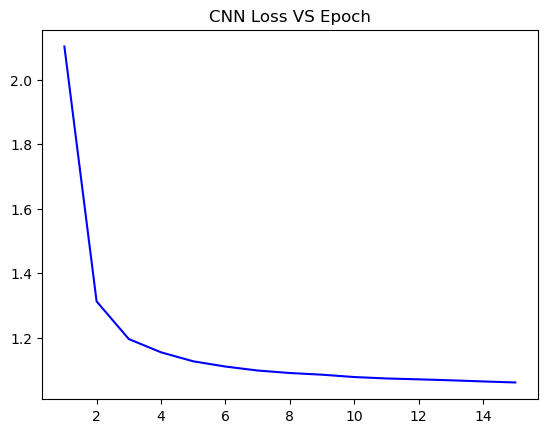

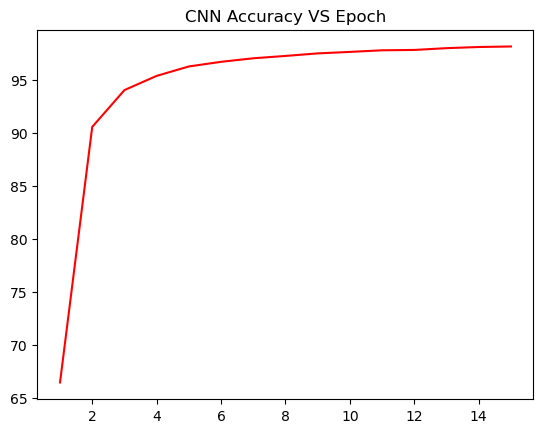

In [11]:
torch.manual_seed(1)

cnn1 = CNN1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn1.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

a=[]
for i in cnn1.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a),)
train_epoch,train_losses,train_acc,trainAvgLossArr =trainFunc(cnn1,max_epochs)
plt.plot(train_epoch,trainAvgLossArr,color="blue")
plt.title('CNN Loss VS Epoch')
plt.show()
plt.plot(train_epoch,train_acc,color="red")
plt.title('CNN Accuracy VS Epoch')
plt.show()

In [12]:
cnn1TestAcc = testFunc(cnn1)

Accuracy of the network: 98.71 %
Accuracy of 0: 99.48979591836735 %
Accuracy of 1: 98.8546255506608 %
Accuracy of 2: 99.2248062015504 %
Accuracy of 3: 98.81188118811882 %
Accuracy of 4: 98.26883910386965 %
Accuracy of 5: 98.65470852017937 %
Accuracy of 6: 99.16492693110648 %
Accuracy of 7: 97.95719844357977 %
Accuracy of 8: 98.870636550308 %
Accuracy of 9: 97.81962338949455 %


 # Second CNN

In [13]:

class CNN2(nn.Module):
    def __init__(self,):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(20*kernel_size*kernel_size, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.fc2 = nn.Linear(50,50)
        self.fc3 = nn.Linear(50,40)
        self.fc4 = nn.Linear(40,30)
        self.fc5 = nn.Linear(30, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN       
        x = F.relu(self.fc2(x))        #Fully Connected NN 
        x = F.relu(self.fc3(x))        #Fully Connected NN 
        x = F.relu(self.fc4(x))        #Fully Connected NN 
        x = self.fc5(x)                #O/P Layer       
        return x
torch.manual_seed(1)

cnn2 = CNN2()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn2.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

a=[]

for i in cnn2.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 2:', np.sum(a),)
train_epoch2,train_losses2,train_acc2,trainAvgLossArr2=trainFunc(cnn2,max_epochs)

Total no of parameters in Model 2: 25570
Max Epoch Reached, Loss: 0.0844, Accuracy:97.845000%


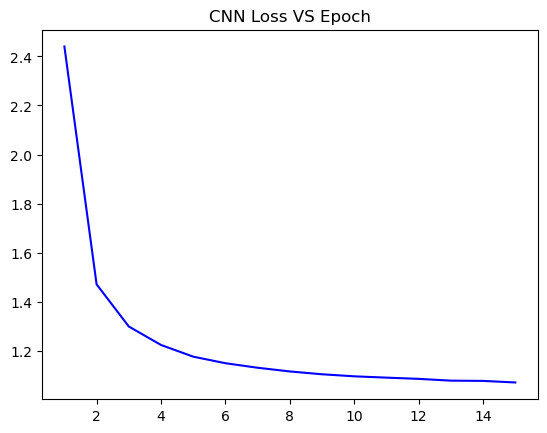

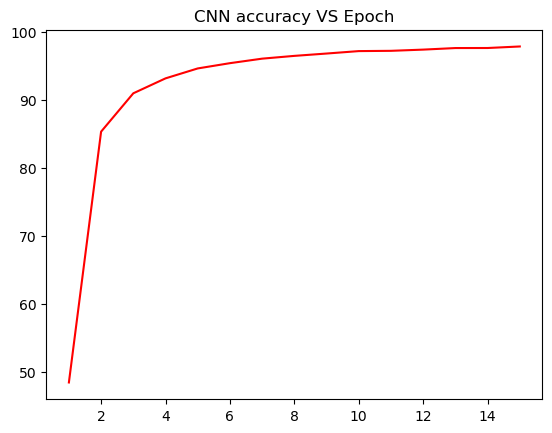

Accuracy of the network: 98.03 %
Accuracy of 0: 99.18367346938776 %
Accuracy of 1: 98.94273127753304 %
Accuracy of 2: 98.15891472868218 %
Accuracy of 3: 96.73267326732673 %
Accuracy of 4: 98.77800407331975 %
Accuracy of 5: 97.6457399103139 %
Accuracy of 6: 99.06054279749478 %
Accuracy of 7: 98.24902723735408 %
Accuracy of 8: 98.25462012320328 %
Accuracy of 9: 95.24281466798811 %


In [14]:
#plot
plt.plot(train_epoch2,trainAvgLossArr2,color="blue")
plt.title('CNN Loss VS Epoch')
plt.show()
#plot
plt.plot(train_epoch2,train_acc2,color="red")
plt.title('CNN accuracy VS Epoch')
plt.show()
cnn2TestAcc = testFunc(cnn2)

Total no of parameters in Model 3: 25621
Max Epoch Reached, Loss: 0.0237, Accuracy:98.901667%


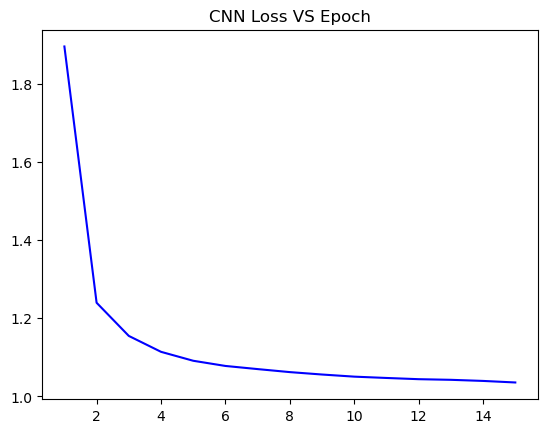

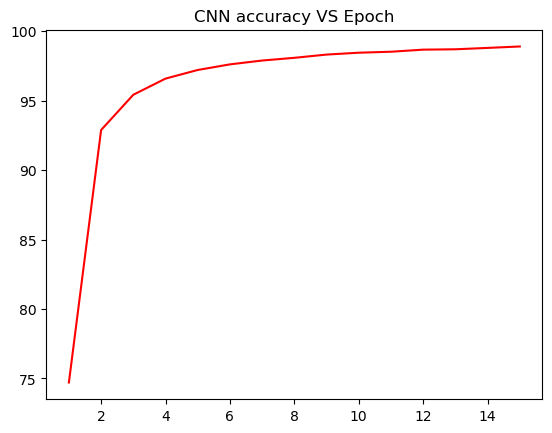

Accuracy of the network: 98.81 %
Accuracy of 0: 99.48979591836735 %
Accuracy of 1: 99.11894273127753 %
Accuracy of 2: 99.2248062015504 %
Accuracy of 3: 99.00990099009901 %
Accuracy of 4: 99.38900203665987 %
Accuracy of 5: 97.53363228699551 %
Accuracy of 6: 99.06054279749478 %
Accuracy of 7: 98.44357976653697 %
Accuracy of 8: 98.97330595482546 %
Accuracy of 9: 97.7205153617443 %


In [15]:
#Model 3
class CNN3(nn.Module):
    def __init__(self,): 
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 15, 5)
        self.fc1 = nn.Linear(15*4*4, 86)
        self.fc2 = nn.Linear(86, 10)
       

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
     
        x = x.view(-1, 15*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x
torch.manual_seed(1)

cnn3 = CNN3()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn3.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

a=[]

for i in cnn3.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 3:', np.sum(a))
train_epoch3,train_losses3,train_acc3,trainAvgLossArr3=trainFunc(cnn3,max_epochs)
#plot
plt.plot(train_epoch3,trainAvgLossArr3,color="blue")
plt.title('CNN Loss VS Epoch')
plt.show()
#plot
plt.plot(train_epoch3,train_acc3,color="red")
plt.title('CNN accuracy VS Epoch')
plt.show()
cnn3TestAcc = testFunc(cnn3)

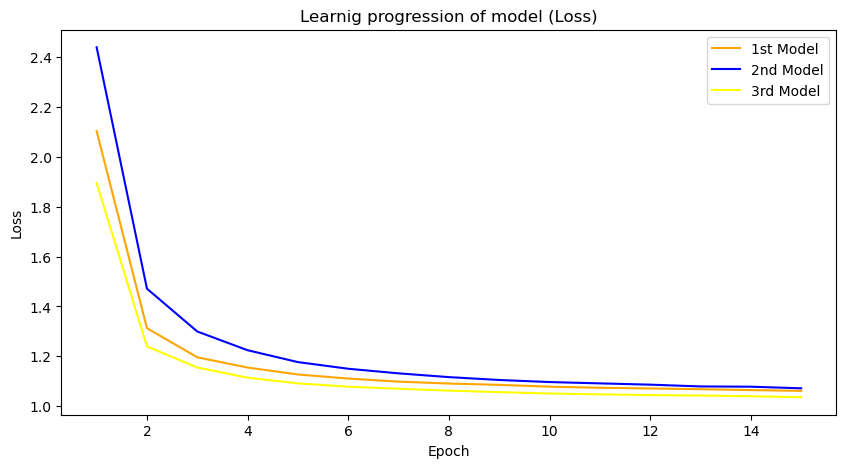

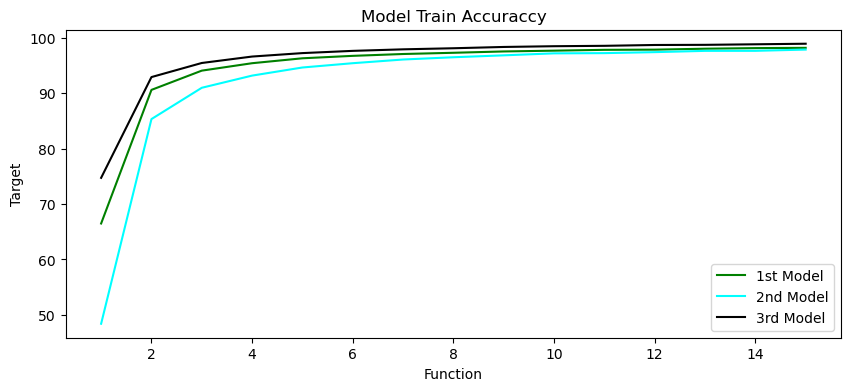

CNN1 Test Accuracy: 98.71 % 
CNN2 Test Accuracy: 98.03 % 
CNN3 Test Accuracy: 98.81 %


In [19]:
plt.figure(figsize=(10,5))
plt.plot(train_epoch,trainAvgLossArr, color = "orange")
plt.plot(train_epoch2,trainAvgLossArr2, color = "blue")
plt.plot(train_epoch3,trainAvgLossArr3, color = "yellow")
#plt.plot(train_epoch4,trainAvgLossArr4, color = "orange")
plt.title('Learnig progression of model (Loss)')
plt.legend(['1st Model', '2nd Model','3rd Model', '4th Model','Orginal Value'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(train_epoch,train_acc,color="green")
plt.plot(train_epoch2,train_acc2,color="cyan")
plt.plot(train_epoch3,train_acc3,color="black")
#plt.plot(train_epoch4,train_acc4,color="orange")
plt.title('Model Train Accuraccy')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.show()

print('CNN1 Test Accuracy:',cnn1TestAcc,'%','\nCNN2 Test Accuracy:',cnn2TestAcc,'%','\nCNN3 Test Accuracy:',cnn3TestAcc,'%')